# Training Data

In [34]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

nltk.download("stopwords")
nltk.download("punkt_tab")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
from nltk.corpus import twitter_samples

positive = ''

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [9]:
review = "The laptop is fast and efficient, but the battery life is terrible. I like the design but it is too heavy to carry around."

utterances = re.split(r"[.,;!?]|\b(?:but|and)\b", review)

utterances = [utterance.strip() for utterance in utterances if utterance.split()]

utterances

['The laptop is fast',
 'efficient',
 'the battery life is terrible',
 'I like the design',
 'it is too heavy to carry around']

In [10]:
# Display each utterance
for i, utterance in enumerate(utterances, 1):
    print(f"Utterance {i}: {utterance}")

Utterance 1: The laptop is fast
Utterance 2: efficient
Utterance 3: the battery life is terrible
Utterance 4: I like the design
Utterance 5: it is too heavy to carry around


In [16]:
stop_words = set(stopwords.words("english"))


def preprocess_utterances(utterance):
    tokens = word_tokenize(utterance.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens


processed_utterance = [preprocess_utterances(utterance) for utterance in utterances]
print(processed_utterance)

[['laptop', 'fast'], ['efficient'], ['battery', 'life', 'terrible'], ['like', 'design'], ['heavy', 'carry', 'around']]


In [25]:
# Sentiment Analysis - Logic Regression Model
# TF-IDF Team Frequency-Inverse Document Frequency

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = {
    "utterances": [
        "The laptop is fast",
        "and efficient",
        "but the battery life is terrible",
        "I like the design",
        "but it is too heavy to carry around",
    ],
    "sentiment": [
        1,
        1,
        0,
        1,
        0,
    ],
}

df = pd.DataFrame(data)

# TF_IDF
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["utterances"])
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 1.0


In [51]:
test_utterances = [
    "the pizza was delicious",
    "the battery life is horrible",
    "The laptop is fast",
    "and efficient",
    "but the battery life is terrible",
    "I like the design",
    "but it is too heavy to carry around",
]
test_utterances_tfidf = vectorizer.transform(test_utterances)
predictions = model.predict(test_utterances_tfidf)
print(predictions)

[1 0 1 1 0 1 0]


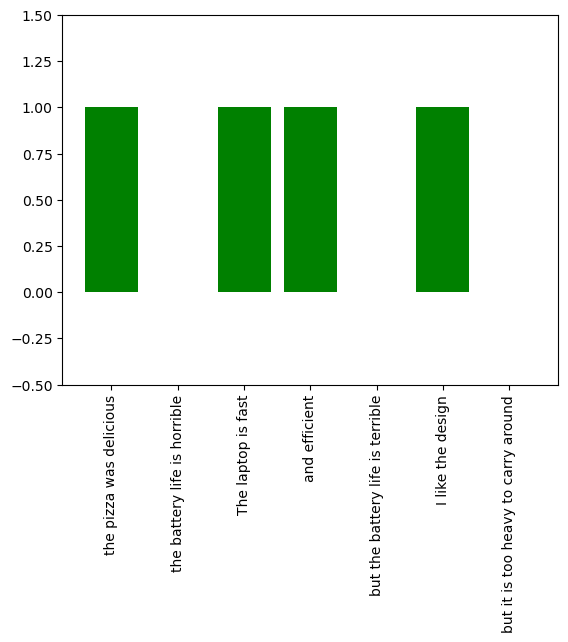

In [72]:
plt.bar(
    test_utterances,
    predictions,
    color=["green" if pred == 1 else "red" for pred in predictions],
)
plt.ylim(-0.5, 1.5)
plt.xticks(rotation="vertical")
plt.show()